# Klasifikasi Kualitas Wine Menggunakan Teknik Data Mining

# Pendahuluan

Dataset Wine Quality yang diambil dari UCI Machine Learning Repository berisi informasi mengenai berbagai karakteristik kimia dan fisika dari dua jenis wine asal Portugal, yaitu red wine (anggur merah) dan white wine (anggur putih). Tujuan utama dari dataset ini adalah untuk memprediksi atau mengklasifikasikan kualitas wine berdasarkan atribut-atribut tersebut.

Dataset ini sering digunakan dalam studi klasifikasi dan regresi, khususnya di bidang data mining dan machine learning, karena memiliki struktur yang bersih, cukup besar, dan fitur yang bermakna.

# Sumber Data
Datase diambil dari link dibawah ini

https://archive.ics.uci.edu/dataset/186/wine+quality

Dua set data disertakan, terkait dengan sampel anggur vinho verde merah dan putih, dari Portugal utara. Tujuannya adalah untuk memodelkan kualitas anggur berdasarkan uji fisikokimia (lihat [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).


# Rincian Dataset
Jumlah instance:  
Red wine: 1.599 data  
White wine: 4.898 data  
Jumlah atribut (fitur): 11 fitur input + 1 target  

Tugas: Klasifikasi atau Prediksi Kualitas


# Tujuan

Dataset ini digunakan untuk membangun model klasifikasi guna memprediksi apakah kualitas wine termasuk dalam kategori rendah, sedang, atau tinggi berdasarkan sifat fisikokimia wine tersebut.

# Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

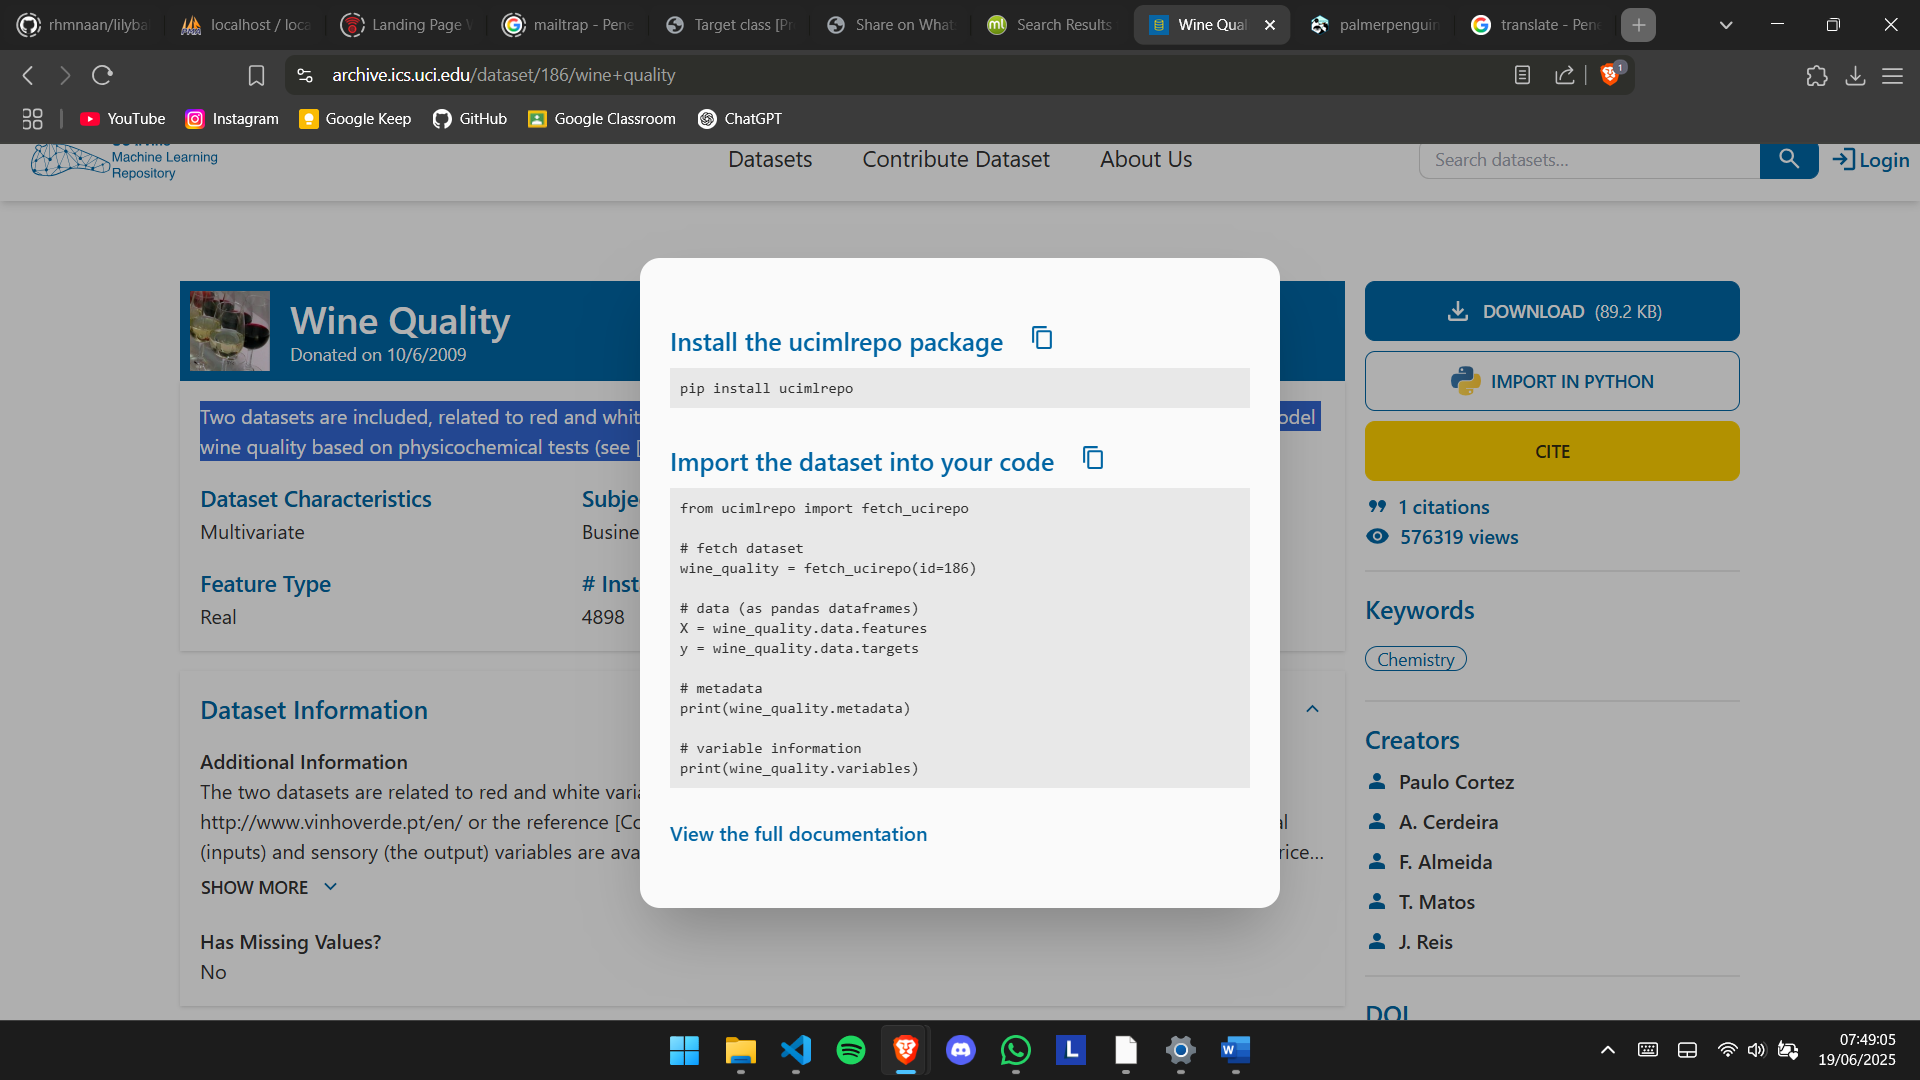

In [25]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

# Eksplorasi Data
### Visualisasi Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [12]:
import pandas as pd

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Tampilkan 5 baris pertama
display(df)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


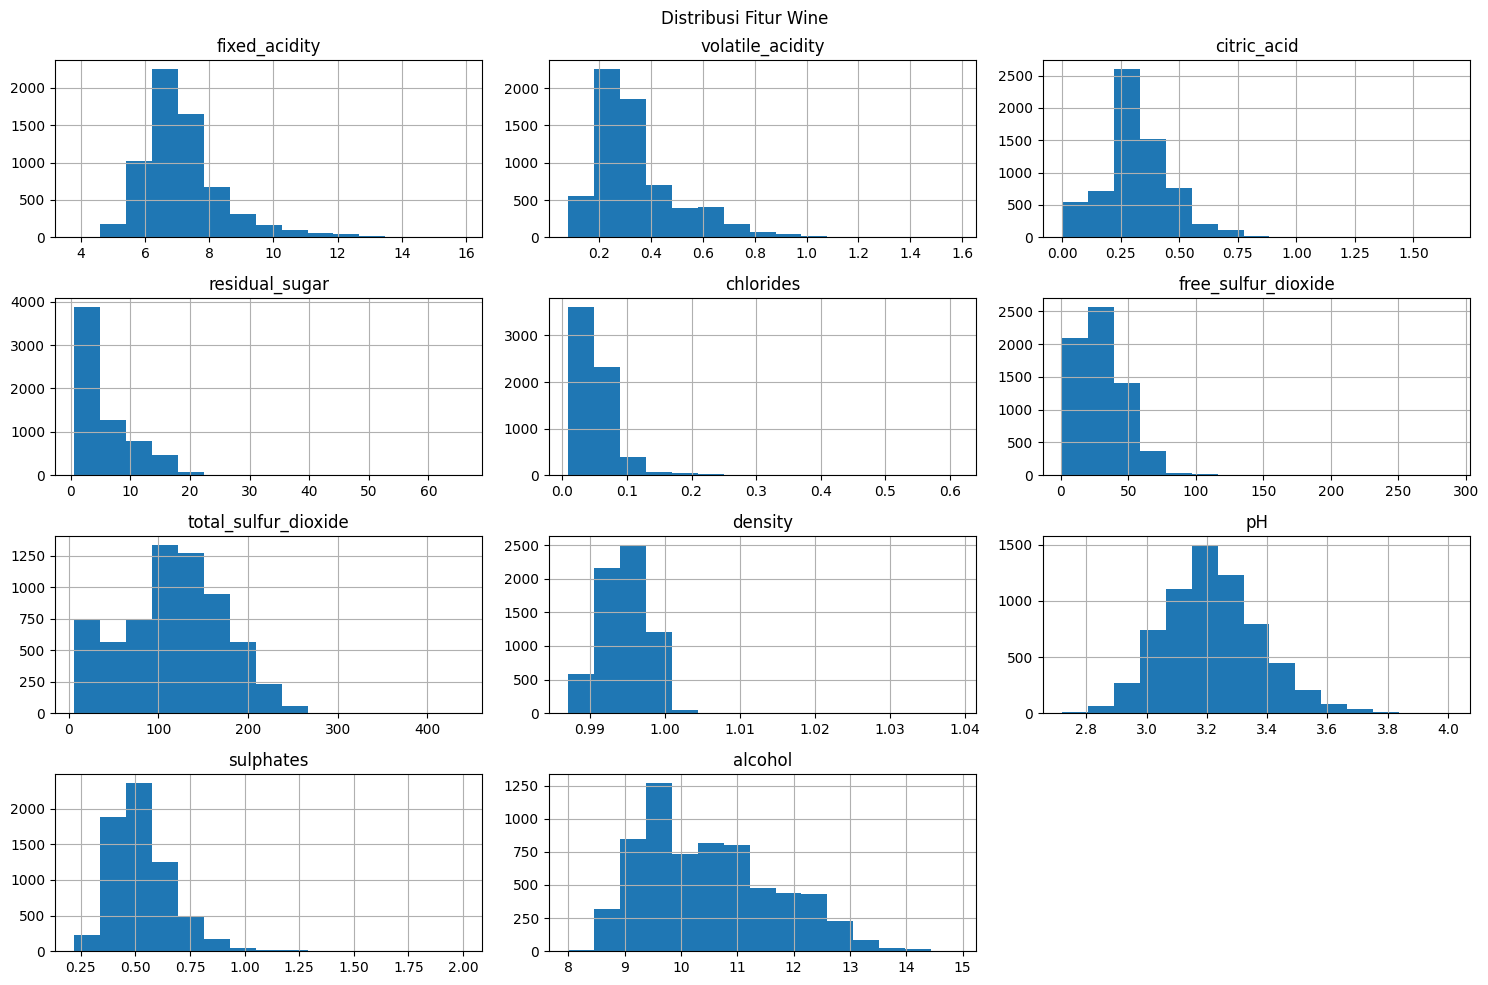

In [7]:
X.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribusi Fitur Wine")
plt.tight_layout()
plt.show()


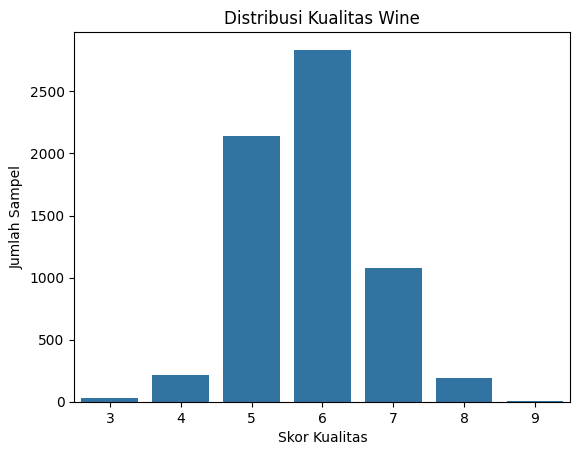

In [9]:
df = pd.concat([X, y], axis=1) 
sns.countplot(x="quality", data=df)
plt.title("Distribusi Kualitas Wine")
plt.xlabel("Skor Kualitas")
plt.ylabel("Jumlah Sampel")
plt.show()


Distribusi Label:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24648\812968063.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="magma")


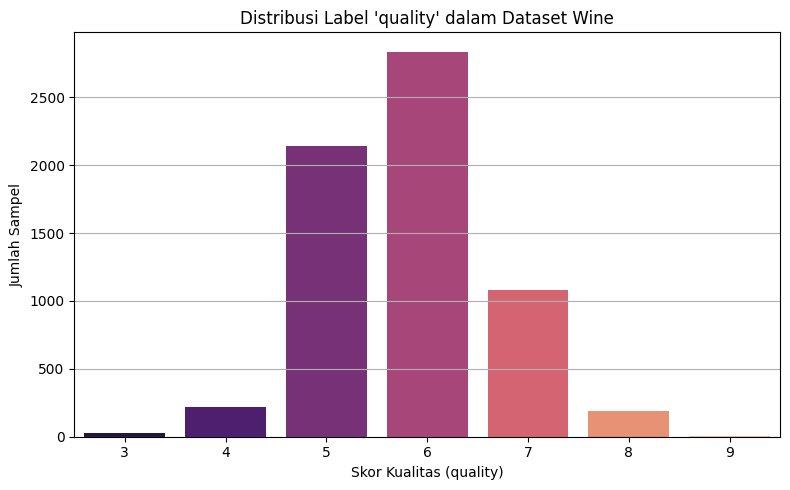

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Ambil dataset Wine Quality
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# Gabungkan data
df = pd.concat([X, y], axis=1)

# Hitung jumlah data per kelas
class_counts = df['quality'].value_counts().sort_index()

# Tampilkan dalam bentuk tabel
print("Distribusi Label:")
print(class_counts)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="magma")
plt.title("Distribusi Label 'quality' dalam Dataset Wine")
plt.xlabel("Skor Kualitas (quality)")
plt.ylabel("Jumlah Sampel")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Struktur Dataset

In [13]:
df.shape #untuk mengetahui bentuk dataset(baris & kolom)

(6497, 12)

Terdapat 6497 Baris dan 12 Kolom

In [14]:
df.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

| No | Nama Fitur                 | Deskripsi                                                                                                   | Satuan / Skala   |
| -- | -------------------------- | ----------------------------------------------------------------------------------------------------------- | ---------------- |
| 1  | **fixed\_acidity**         | Konsentrasi asam tetap seperti tartaric. Tidak menguap saat fermentasi.                                     | gram per dm³     |
| 2  | **volatile\_acidity**      | Asam yang mudah menguap (terutama asam asetat) dan dapat mempengaruhi rasa. Nilai tinggi = rasa tidak enak. | gram per dm³     |
| 3  | **citric\_acid**           | Komponen asam alami, menambah rasa segar dan stabilitas wine.                                               | gram per dm³     |
| 4  | **residual\_sugar**        | Gula yang tersisa setelah fermentasi, memengaruhi rasa manis.                                               | gram per dm³     |
| 5  | **chlorides**              | Kandungan garam (natrium klorida) dalam wine. Nilai tinggi = rasa asin.                                     | gram per dm³     |
| 6  | **free\_sulfur\_dioxide**  | SO₂ bebas, berfungsi sebagai antimikroba dan antioksidan.                                                   | mg per dm³       |
| 7  | **total\_sulfur\_dioxide** | Total SO₂ (bebas + terikat). Digunakan untuk konservasi wine.                                               | mg per dm³       |
| 8  | **density**                | Massa jenis wine. Berkorelasi dengan kadar alkohol dan gula.                                                | gram per cm³     |
| 9  | **pH**                     | Tingkat keasaman wine. Skala 0–14. Nilai lebih rendah = lebih asam.                                         | Skala logaritmik |
| 10 | **sulphates**              | Aditif untuk meningkatkan stabilitas mikrobiologis.                                                         | gram per dm³     |
| 11 | **alcohol**                | Kandungan alkohol dalam wine. Umumnya berkisar antara 8% – 14%.                                             | % (volume)       |
| 12 | **quality**                | Skor kualitas wine berdasarkan uji rasa oleh panel ahli.                                                    | Integer (0–10)   |


In [17]:
df.dtypes #untuk mengetahui tipe data dari masing-masing kolom

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Deskripsi Dataset Kualitas Wine

Berdasarkan informasi yang ditampilkan, ini adalah dataset yang berisi karakteristik berbagai sampel wine dengan penilaian kualitasnya.

## Struktur Data
- Dataset terdiri dari 12 kolom dengan 11 fitur (variabel independen) dan 1 target variabel (quality)
- Semua fitur berupa numerik:
  - 11 kolom bertipe float64 (angka desimal)
  - 1 kolom bertipe int64 (quality)

## Variabel Fitur
Fitur-fitur yang tercantum meliputi:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol (kandungan alkohol)



### **Label: `quality`**

* **Tipe**: Numerik Diskret (Integer)
* **Rentang Nilai**: 0 – 10
  (Namun dalam praktiknya, hanya nilai **3–8** yang umum muncul)



###  **Deskripsi**

Fitur `quality` adalah **target variabel** yang menunjukkan **penilaian kualitas wine** berdasarkan uji rasa (*sensory evaluation*) oleh panel ahli. Skor ini merupakan hasil gabungan dari berbagai aspek sensorik seperti:

* Aroma
* Rasa
* Keseimbangan asam dan manis
* Rasa akhir (aftertaste)
* Keseluruhan impresi

Nilai yang lebih tinggi menandakan wine yang dinilai **lebih berkualitas**.

###  **Deskripsi Pengelompokan Label Kualitas Wine**

Dalam dataset *Wine Quality*, variabel `quality` merupakan skor penilaian sensorik wine oleh panel ahli dengan nilai integer dari **0 hingga 10**. Meskipun demikian, dalam praktik pengolahan data dan penerapan algoritma klasifikasi, skor ini sering kali **dikelompokkan ke dalam rentang kelas (kategori)** seperti *rendah*, *sedang*, dan *tinggi*. Pengelompokan ini dilakukan atas beberapa pertimbangan penting, yaitu:

###  **1. Distribusi Data yang Tidak Merata**

Distribusi skor `quality` tidak merata dan cenderung terkonsentrasi pada nilai **5, 6, dan 7**, sementara nilai seperti **3, 4, 8, dan 9** jumlahnya jauh lebih sedikit, dan nilai **0–2 atau 10** bahkan sering tidak muncul sama sekali. Hal ini dapat menimbulkan **masalah ketidakseimbangan kelas (class imbalance)** yang berdampak buruk pada performa model klasifikasi.

###  **2. Penyederhanaan Masalah Klasifikasi**

Mengelompokkan skor `quality` menjadi rentang kelas (misalnya: `rendah = 3–5`, `sedang = 6`, dan `tinggi = 7–8`) membuat tugas klasifikasi menjadi lebih sederhana dan stabil, terutama dalam konteks pembelajaran mesin. Ini juga membantu meningkatkan **akurasi dan generalisasi model**, serta **menghindari overfitting terhadap kelas minoritas**.

###  **3. Relevansi dengan Tujuan Nyata**

Dalam konteks industri wine atau sistem rekomendasi, pengguna lebih tertarik pada **kategori kualitas secara umum**, seperti:

* Apakah wine ini **layak konsumsi atau tidak**?
* Apakah wine ini masuk kategori **premium atau biasa saja**?

Penggunaan rentang kelas membuat hasil analisis **lebih bermakna dan praktis** bagi pengguna akhir daripada skor numerik yang presisi tapi sulit ditafsirkan.

###  **4. Konsistensi dengan Penelitian Terdahulu**

Banyak studi terdahulu menggunakan pendekatan klasifikasi berbasis rentang kelas untuk dataset wine ini, sehingga mengikuti metode tersebut dapat mempermudah perbandingan performa dan validasi hasil.


### **Contoh Skema Pengelompokan yang Umum Digunakan**

| Skor Quality | Kelas Kategori | Keterangan |
| ------------ | -------------- | ---------- |
| 3 – 5        | 0              | Rendah     |
| 6            | 1              | Sedang     |
| 7 – 8        | 2              | Tinggi     |






# Identifikasi Kualitas Dataset

### Deteksi Missing Value  
Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data.

- Estimasi parameter.

- Imputasi.

Dalam modul kali ini saya akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


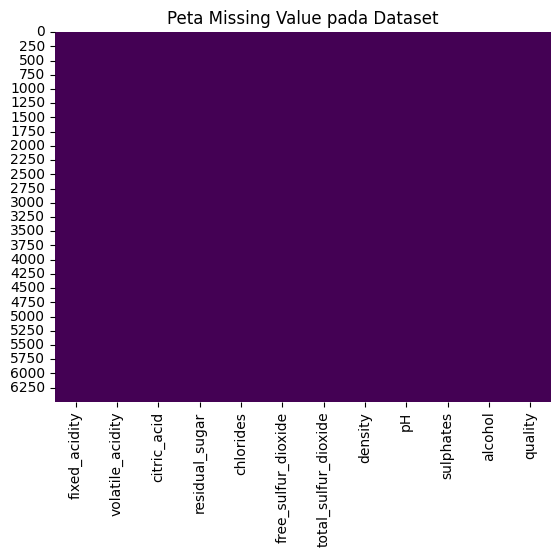

In [18]:
# Deteksi missing value
print(df.isnull().sum())

# Visualisasi (opsional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Peta Missing Value pada Dataset")
plt.show()


In [19]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = df.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, quality]
Index: []
Missing Value Counts:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Tidak ada missing value

# Preprocessing Data

# Modeling 


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
# Misal nama DataFrame-mu adalah `data`
X = df.drop('quality', axis=1)
y = df['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling (wajib untuk SVM dan Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("🎯 Decision Tree")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


🎯 Decision Tree
[[  0   0   4   2   0   0   0]
 [  1   5  17  14   6   0   0]
 [  1  15 281 102  26   3   0]
 [  1  12 102 359  79  14   0]
 [  0   2  15  68 124   7   0]
 [  0   0   0  11  11  16   1]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.15      0.12      0.13        43
           5       0.67      0.66      0.66       428
           6       0.65      0.63      0.64       567
           7       0.50      0.57      0.54       216
           8       0.40      0.41      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.34      0.34      0.34      1300
weighted avg       0.60      0.60      0.60      1300



# Model 2 SVM Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # Bisa dicoba linear juga
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)

print("🎯 Support Vector Machine (SVM)")
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))




🎯 Support Vector Machine (SVM)
[[  0   0   3   3   0   0   0]
 [  0   0  26  17   0   0   0]
 [  0   0 261 166   1   0   0]
 [  0   0 111 426  30   0   0]
 [  0   0   5 155  56   0   0]
 [  0   0   0  24  15   0   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.64      0.61      0.63       428
           6       0.54      0.75      0.63       567
           7       0.54      0.26      0.35       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1300
   macro avg       0.25      0.23      0.23      1300
weighted avg       0.54      0.57      0.54      1300



c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

nb_pred = nb_model.predict(X_test_scaled)

print("🎯 Naive Bayes")
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))




🎯 Naive Bayes
[[  2   1   2   0   1   0   0]
 [  3   6  15  11   7   1   0]
 [  8  13 205 164  37   1   0]
 [  5   7 146 231 163  15   0]
 [  2   0  16  67 108  23   0]
 [  0   0   5  12  18   4   0]
 [  0   0   0   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.10      0.33      0.15         6
           4       0.22      0.14      0.17        43
           5       0.53      0.48      0.50       428
           6       0.48      0.41      0.44       567
           7       0.32      0.50      0.39       216
           8       0.09      0.10      0.10        39
           9       0.00      0.00      0.00         1

    accuracy                           0.43      1300
   macro avg       0.25      0.28      0.25      1300
weighted avg       0.45      0.43      0.43      1300



c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.metrics import accuracy_score

# Akurasi masing-masing model
acc_dt = accuracy_score(y_test, dt_pred)
acc_svm = accuracy_score(y_test, svm_pred)
acc_nb = accuracy_score(y_test, nb_pred)

# Tampilkan hasil evaluasi
print("📊 Akurasi Model:")
print(f"Decision Tree : {acc_dt:.4f}")
print(f"SVM           : {acc_svm:.4f}")
print(f"Naive Bayes   : {acc_nb:.4f}")


📊 Akurasi Model:
Decision Tree : 0.6038
SVM           : 0.5715
Naive Bayes   : 0.4277


In [27]:
import pandas as pd

akurasi_df = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'Naive Bayes'],
    'Akurasi': [acc_dt, acc_svm, acc_nb]
})

print("\n📈 Tabel Perbandingan Akurasi:")
print(akurasi_df)



📈 Tabel Perbandingan Akurasi:
           Model   Akurasi
0  Decision Tree  0.603846
1            SVM  0.571538
2    Naive Bayes  0.427692


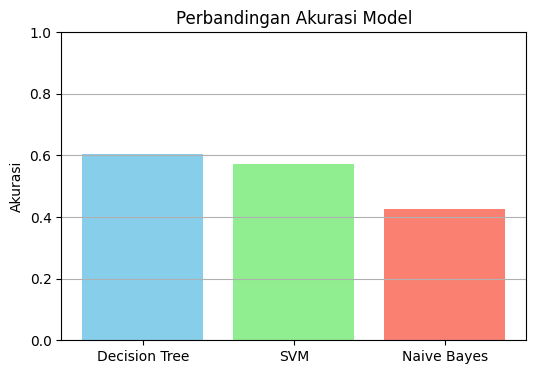

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(akurasi_df['Model'], akurasi_df['Akurasi'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

